In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
sns.set()

%matplotlib inline
plt.style.use('ggplot')

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

In [2]:
train_data=pd.read_excel('C:\\Users\\Taha\\Documents\\SUMMER\\corona hackathon flipr\\Train_Dataset.xlsx')
test_data=pd.read_excel('C:\\Users\\Taha\\Documents\\SUMMER\\corona hackathon flipr\\Test_Dataset.xlsx')
train=train_data.copy()
test=test_data.copy()

display(train_data.head())
display(test_data.head())

In [3]:
# remove clearly unwanted variables
train.drop(['people_ID','Name','Designation'],axis=1,inplace=True)
train.describe(include='all')

,Region,Gender,Married,Children,Occupation,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
count,10714,10714,10714,10403.000000,9967,10711,10714.000000,10714.000000,10488,10714.000000,10714.000000,10714,10617,9998.000000,9790.000000,10698.000000,9600.000000,9600.000000,10679.000000,10714.000000,10714.000000,9.624000e+03,1.071400e+04,9991.000000,10714.000000
unique,5,2,2,NaN,9,3,NaN,NaN,4,NaN,NaN,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Chennai,Female,YES,NaN,Legal,Public,NaN,NaN,Hypertension,NaN,NaN,<400,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2581,5423,8481,NaN,1174,3588,NaN,NaN,2642,NaN,NaN,2702,2681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.062770,NaN,NaN,3.285888,0.523241,NaN,42.083722,9.013067,NaN,NaN,278.806261,87.795812,116.170967,275.292292,74.847396,52.632737,20.028094,5.015027,2.644919e+06,1.304713e+06,1.004604,52.280680
std,NaN,NaN,NaN,0.818222,NaN,NaN,2.721274,0.854303,NaN,15.323397,3.714970,NaN,NaN,97.985526,41.851103,55.178811,43.669692,14.869104,10.434293,11.828445,1.399770,1.383346e+06,6.075947e+05,0.815257,10.674667
min,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,0.000000,NaN,16.000000,3.000000,NaN,NaN,110.000000,15.000000,20.000000,200.000000,50.000000,35.000000,0.000000,3.000000,3.000000e+05,3.000000e+05,0.000000,29.289600
25%,NaN,NaN,NaN,0.000000,NaN,NaN,2.000000,0.000000,NaN,29.000000,6.000000,NaN,NaN,194.000000,52.000000,68.000000,237.000000,62.000000,44.000000,10.000000,4.000000,1.400000e+06,8.000000e+05,0.000000,47.277426
50%,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,0.000000,NaN,42.000000,9.000000,NaN,NaN,276.000000,88.000000,117.000000,276.000000,75.000000,53.000000,20.000000,5.000000,2.600000e+06,1.300000e+06,1.000000,49.008389
75%,NaN,NaN,NaN,2.000000,NaN,NaN,4.000000,1.000000,NaN,55.000000,12.000000,NaN,NaN,364.000000,124.000000,165.000000,313.000000,88.000000,62.000000,30.000000,6.000000,3.800000e+06,1.800000e+06,2.000000,52.762313


In [4]:
train.drop(['Deaths/1M','Region'],axis=1,inplace=True)


In [5]:
# trainwd.columns[trainwd.dtypes==object]

In [6]:
# print(trainwd['comorbidity'].unique())
# #print(trainwd['Pulmonary score'].unique())
# print(trainwd['cardiological pressure'].unique())

# trainwd['comorbidity']=trainwd['comorbidity'].map({'Hypertension':1 ,'Diabetes':2,   'None':3 ,'Coronary Heart Disease':4})
# #trainwd['Pulmonary score']=trainwd['Pulmonary score'].map({'<400':1, '<100':2, '<300':3 ,'<200':4})
# trainwd['cardiological pressure']=trainwd['cardiological pressure'].map({'Normal':1,  'Stage-02':2, 'Elevated':3 ,'Stage-01':4})
# trainwd.head()

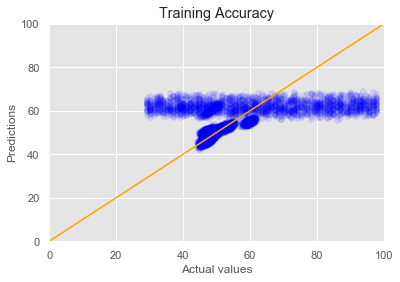

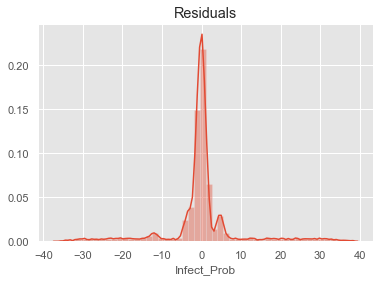

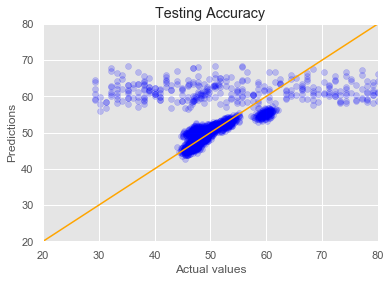

In [7]:

trainwd=pd.get_dummies(train,drop_first=True)

trainwdnn=trainwd.copy()

for i in trainwdnn.columns[trainwdnn.isnull().any(axis=0)]:
    trainwdnn[i].fillna(trainwdnn[i].median(),inplace=True)
# trainwdnn=trainwdnn.dropna()
    
targets=trainwdnn['Infect_Prob']
inputs=trainwdnn.drop(['Infect_Prob'],axis=1)


from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)
inputs_scaled=scaler.transform(inputs)
inputs_scaled

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs_scaled,targets,test_size=0.2,random_state=365)

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)


x = np.linspace(0, 100)
y_hat=reg.predict(x_train)
plt.scatter(y_train,y_hat,alpha=0.1,color='blue')
plt.title("Training Accuracy")
plt.xlabel("Actual values")
plt.ylabel("Predictions")
plt.plot( x,x,color='orange')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

sns.distplot(y_train-y_hat)
plt.title('Residuals')
plt.show()


y_hat_test=reg.predict(x_test)
plt.scatter(y_test,y_hat_test,alpha=0.2,color='blue')
plt.xlabel("Actual values")
plt.ylabel("Predictions")
plt.title("Testing Accuracy")
plt.xlim(20,80)
plt.ylim(20,80)
plt.plot( x,x,color='orange')
plt.show()

In [8]:
def adjRsquared(x,y,reg):
    R=reg.score(x,y)
    n=x.shape[0]
    p=x.shape[1]
    return 1-(1-R)*(n-1)/(n-p-1)


In [9]:
print("Intercept : ",reg.intercept_)
print("R Squared : ",reg.score(x_train,y_train))
print("Adjusted R squared : ",adjRsquared(x_train,y_train,reg))
reg_summary=pd.DataFrame(inputs.columns.values,columns=     ['Features'])
reg_summary['Weights']=reg.coef_

from sklearn.feature_selection import f_regression
f_regression(x_train,y_train)

p_values=f_regression(x_train,y_train)[1]
reg_summary['p values']=p_values.round(3)

display(reg_summary)


Intercept :  52.28772223359602
R Squared :  0.28807096762578055
Adjusted R squared :  0.2850677516467002


,Features,Weights,p values
0,Children,1.831552,0.000
1,cases/1M,1.822862,0.000
2,Age,-0.038140,0.000
3,Coma score,0.398033,0.000
4,Diuresis,0.132252,0.106
5,Platelets,0.527208,0.000
6,HBB,0.284435,0.020
7,d-dimer,0.154031,0.058
8,Heart rate,-0.081012,0.636
9,HDL cholesterol,0.246869,0.041


In [10]:
df_pf=pd.DataFrame(np.exp(y_hat_test),columns=['Prediction'])
y_test=y_test.reset_index(drop=True)
df_pf['Actual Values']=np.exp(y_test)
df_pf['Difference']=(df_pf['Prediction']-df_pf['Actual Values'])
df_pf['Difference%']=np.absolute(df_pf['Difference']/df_pf['Actual Values']*100)
df_pf.describe()

,Prediction,Actual Values,Difference,Difference%
count,2.143000e+03,2.143000e+03,2.143000e+03,2.143000e+03
mean,3.136798e+27,1.113140e+40,-1.113140e+40,3.616287e+14
std,2.715507e+28,1.442101e+41,1.442101e+41,7.894271e+15
min,3.221982e+18,5.251842e+12,-2.517902e+42,9.037448e-02
25%,7.601566e+20,3.450506e+20,-1.111706e+21,4.884751e+01
50%,9.778872e+21,1.783093e+21,9.590674e+19,9.871570e+01
75%,5.376402e+23,6.949468e+22,8.144999e+21,2.906636e+02
max,4.996444e+29,2.517902e+42,4.996444e+29,2.605166e+17


In [11]:
from sklearn import metrics
print("Mean Absolute Error",metrics.mean_absolute_error(y_test,y_hat_test))
print("Mean Squared Error",metrics.mean_squared_error(y_test,y_hat_test))
print("Root Mean Squared Error",np.sqrt(metrics.mean_absolute_error(y_test,y_hat_test)))

Mean Absolute Error 4.5561058227180125
Mean Squared Error 80.80041980265477
Root Mean Squared Error 2.134503647857743


In [12]:
test.drop(['people_ID','Name','Designation','Region','Deaths/1M'],axis=1,inplace=True)

In [13]:
test

,Gender,Married,Children,Occupation,Mode_transport,cases/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month
0,Female,YES,2,Driver,Public,4,Diabetes,52,3,<200,Stage-01,388,153,196,240,85,53,17,3,3900000,1300000,1
1,Male,YES,2,Legal,Walk,4,Diabetes,53,11,<200,Stage-01,409,95,138,241,81,61,2,5,1800000,1300000,1
2,Female,YES,2,Sales,Car,4,Diabetes,35,9,<100,Stage-02,440,40,166,236,88,47,24,3,5000000,2000000,2
3,Female,YES,2,Sales,Car,4,None,31,12,<300,Elevated,206,78,83,211,87,52,13,6,3100000,600000,2
4,Female,YES,2,Business,Car,4,Diabetes,51,6,<200,Stage-01,229,109,207,312,94,68,39,5,2300000,1500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14493,Male,YES,0,Cleaner,Walk,11,Coronary Heart Disease,55,5,<400,Normal,417,16,36,346,66,45,34,3,4200000,800000,2
14494,Female,YES,0,Clerk,Car,11,None,44,4,<300,Elevated,199,22,29,278,94,37,23,6,4500000,1800000,2
14495,Male,YES,0,Business,Public,11,None,46,6,<300,Elevated,161,15,28,294,73,56,6,6,4300000,800000,1
14496,Female,YES,0,Driver,Car,11,Coronary Heart Disease,34,5,<200,Stage-01,174,31,24,227,83,60,32,7,2400000,1800000,2


In [14]:
testwd=pd.get_dummies(test,drop_first=True)


scaler2=StandardScaler()
scaler2.fit(testwd)
test_scaled=scaler2.transform(testwd)
test_scaled

array([[ 1.25773692, -0.40561468,  0.64703118, ..., -0.5811202 ,
         1.71112034, -0.56890739],
       [ 1.25773692, -0.40561468,  0.71228021, ..., -0.5811202 ,
         1.71112034, -0.56890739],
       [ 1.25773692, -0.40561468, -0.46220242, ..., -0.5811202 ,
        -0.58441243,  1.75775533],
       ...,
       [-1.20590827,  1.09925523,  0.25553697, ..., -0.5811202 ,
        -0.58441243, -0.56890739],
       [-1.20590827,  1.09925523, -0.52745145, ..., -0.5811202 ,
         1.71112034, -0.56890739],
       [-1.20590827,  1.09925523, -0.9841947 , ..., -0.5811202 ,
         1.71112034, -0.56890739]])

In [15]:
predictions=(reg.predict(test_scaled))

In [16]:
ans=pd.DataFrame(predictions,columns=['Predictions'])
ans

,Predictions
0,52.248466
1,51.504917
2,51.842754
3,51.800634
4,52.573179
...,...
14493,47.874377
14494,46.920148
14495,48.461639
14496,47.541978


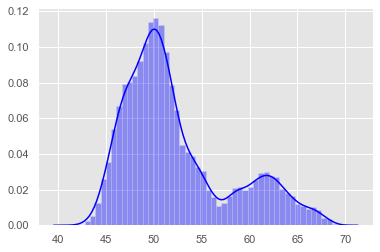

In [17]:
sns.distplot(predictions,color='blue')